### Registration number : 2003287

In [1]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import warnings # To ignore the warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
train=pd.read_csv("CE802_P3_Data.csv")
test=pd.read_csv("CE802_P3_Test.csv")

In [3]:
train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,UK,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,Very high,7841.50,1605.31
1,86.58,12,20.07,Europe,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,Very low,25589.98,0.00
2,75.95,6,45.00,USA,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,Low,16849.14,3241.77
3,156.57,12,12.93,USA,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,Very low,10791.06,0.00
4,101.27,3,0.51,Rest,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,Very low,14760.66,336.25


In [4]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,154.97,9,0.57,USA,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,Low,22482.82,NaN
1,78.99,6,2.31,USA,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,High,17183.76,NaN
2,115.81,6,0.24,UK,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,Very high,17585.36,NaN
3,48.99,9,1023.63,Rest,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,High,14621.10,NaN
4,71.39,6,1.68,Europe,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,Medium,14624.56,NaN


### Data Preprocessing & Feature Engineering

In [5]:
train.info() # no null values in train data
print("----------------------------------------------")
test.info() #no null values in test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     1500 non-null   object 
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data

In [6]:
train.describe()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,93.168033,11.828000,190.808320,-6.788620,1376.728553,1092.897040,-10.495153,8.109187,274.393133,-345.797880,12.124980,20.426667,7.894667,16633.036680,922.082533
std,29.857614,5.430108,2322.462888,9.072751,301.420683,592.936195,3.040026,5.812853,42.241393,87.920436,8.681726,4.183142,3.673405,8886.071078,1092.331874
min,-25.550000,0.000000,0.000000,-35.070000,350.680000,-1035.560000,-20.200000,0.080000,83.890000,-653.160000,0.120000,-7.190000,0.000000,-22890.400000,0.000000
25%,73.120000,9.000000,0.390000,-13.140000,1175.880000,682.885000,-12.475000,3.815000,253.320000,-403.890000,5.835000,18.535000,6.000000,12544.200000,0.000000
50%,93.215000,12.000000,3.030000,-6.780000,1373.145000,1098.550000,-10.600000,6.740000,274.455000,-343.380000,10.245000,20.445000,8.000000,16635.150000,429.570000
75%,114.035000,15.000000,20.415000,-0.420000,1585.802500,1498.155000,-8.540000,10.945000,294.392500,-286.860000,16.477500,22.405000,10.000000,21105.420000,1530.205000
max,198.390000,30.000000,82423.590000,20.280000,2427.610000,3081.120000,-0.430000,45.140000,555.360000,-76.740000,70.170000,36.680000,22.000000,57340.060000,3960.010000


Text(0.5, 1.0, 'Correlation Coefficients w.r.t Target')

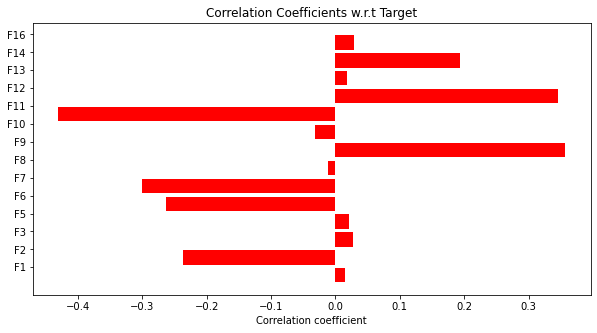

In [7]:
# Plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[0:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train['Target'].values)[0,1])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,5))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Target")

In [8]:
# Categorical Values
print(train['F4'].unique())
print(train['F15'].unique())
print(test['F4'].unique())
print(test['F15'].unique())

['UK' 'Europe' 'USA' 'Rest']
['Very high' 'Very low' 'Low' 'Medium' 'High']
['USA' 'UK' 'Rest' 'Europe']
['Low' 'High' 'Very high' 'Medium' 'Very low']


In [9]:
# Checking the count of each unique value
print(train['F4'].value_counts())
print(train['F15'].value_counts())

USA       407
Europe    380
Rest      360
UK        353
Name: F4, dtype: int64
Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F15, dtype: int64


In [10]:
# seperating train output variable
X_train = train.drop('Target',axis=1)
Y_train = train['Target']

# seperating test output variable
X_test = test.drop('Target',axis=1)
Y_test= test['Target'] 

# Seperating numerical features from Categorical 
train_num = X_train.drop(['F4','F15'],axis = 1)
test_num = X_test.drop(['F4','F15'],axis = 1)

# Normalizing the numerical features in train data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_num.values)
X_train = pd.DataFrame(X_train_scaled, columns = ['F1','F2','F3','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F16'])

# Normalizing the numerical features in test data
X_test_scaled = scaler.fit_transform(test_num.values)
X_test = pd.DataFrame(X_test_scaled, columns = ['F1','F2','F3','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F16'])

# Converting Categorical to numerical values and joining them
train_dummies = pd.get_dummies(train['F4'])
train_dummies1 = pd.get_dummies(train['F15'], drop_first=True)
X_train = X_train.join([train_dummies,train_dummies1])
test_dummies = pd.get_dummies(test['F4'])
test_dummies1 = pd.get_dummies(test['F15'], drop_first=True)
X_test = X_test.join([test_dummies,test_dummies1])

### Model Building & Hyper-parameter Tuning

#### Linear Regression

In [11]:
Regressor1 = LinearRegression()
# Fitting the model
Regressor1.fit(X_train,Y_train)
# Evaluation Metrics
y_pred = Regressor1.predict(X_train)
print('MAE:', metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:', metrics.mean_squared_error(Y_train, y_pred))
print('R2:', metrics.r2_score(Y_train, y_pred))

MAE: 389.51396000000005
MSE: 249271.9028686667
R2: 0.7909482813118549


#### RandomForest 

In [12]:
Regressor2 = RandomForestRegressor()
# Taking the Hyper parameters
parameters = [{'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)], # Number of trees in random forest
               'max_features' : ['auto', 'sqrt'],# Number of features to consider at every split
               'max_depth' : [int(x) for x in np.linspace(5, 30, num = 6)],# Maximum number of levels in tree
               'min_samples_split' : [2, 5, 10, 15, 100],# Minimum number of samples required to split a node
               'min_samples_leaf' : [1, 2, 5, 10]# Minimum number of samples required at each leaf node
              }]
# Applying RandomizedSearchCV to find the best model and the best parameters
RandomSearch2 = RandomizedSearchCV(estimator = Regressor2, 
                               param_distributions = parameters,scoring='neg_mean_absolute_error',
                               n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = -1)
# Fitting the model
RandomSearch2.fit(X_train,Y_train)
print("Best Parameters = ", RandomSearch2.best_params_)

Best Parameters =  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}


In [13]:
# Evaluation Metrics
y_pred = RandomSearch2.predict(X_train)
print('MAE:', metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:', metrics.mean_squared_error(Y_train, y_pred))
print('R2:', metrics.r2_score(Y_train, y_pred))

MAE: 267.1420836669769
MSE: 139067.17350361843
R2: 0.8833714056840528


#### KNN 

In [14]:
Regressor3 = KNeighborsRegressor()
# Taking the Hyper parameters
parameters = [{'n_neighbors': range(1,10,1)}]
# Applying RandomizedSearchCV to find the best model and the best parameters
RandomSearch3 = RandomizedSearchCV(estimator = Regressor3, 
                               param_distributions = parameters,scoring='neg_mean_absolute_error',
                               n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = -1)
# Fitting the model
RandomSearch3.fit(X_train,Y_train)
print("Best Parameters = ", RandomSearch3.best_params_)

Best Parameters =  {'n_neighbors': 3}


In [15]:
# Evaluation Metrics
y_pred = RandomSearch3.predict(X_train)
print('MAE:', metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:', metrics.mean_squared_error(Y_train, y_pred))
print('R2:', metrics.r2_score(Y_train, y_pred))

MAE: 363.2856088888889
MSE: 284573.23415345186
R2: 0.7613428428643773


#### SVM 

In [16]:
Regressor4 = SVR()
# Taking the Hyper parameters
parameters = [{'C': [100,1000,10000,14000,15000,16000,17000], 'kernel': ['rbf'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# Applying RandomizedSearchCV to find the best model and the best parameters
RandomSearch4 = RandomizedSearchCV(estimator = Regressor4, 
                               param_distributions = parameters,scoring='neg_mean_absolute_error',
                               n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = -1)
# Fitting the model
RandomSearch4.fit(X_train,Y_train)
print("Best Parameters = ", RandomSearch4.best_params_)

Best Parameters =  {'kernel': 'rbf', 'gamma': 0.4, 'C': 17000}


In [17]:
# Evaluation Metrics
y_pred = RandomSearch4.predict(X_train)
print('MAE:', metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:', metrics.mean_squared_error(Y_train, y_pred))
print('R2:', metrics.r2_score(Y_train, y_pred))

MAE: 104.29676251901901
MSE: 54600.864134688614
R2: 0.9542090209211086


#### Deep Neural Network

In [77]:
# We took Relu function as it clips the negative values
def create_model():
    '''
    Create a neural network
    '''
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'))
    model.add(Dropout(0.2)) # We are dropping a few neurons for generalizing the model
    model.add(Dense(256, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'))
    model.add(Dense(256, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'))
    model.add(Dense(1, activation="relu", kernel_initializer='normal'))
    adam = Adam(lr=1e-3, decay=1e-3)

    # Compile model
    model.compile(loss="mean_squared_error", optimizer=adam, metrics=[rmse])

    return model

In [78]:
from keras import backend as K
def rmse(y_true, y_pred):
    '''
    RMSE calculus to use during training phase
    '''
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [79]:
# Hyperparameters and create the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.initializers import RandomNormal
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

batch_size = 256
nb_epoch = 1000

print('Build model...')
model = create_model()
model.summary()

Build model...
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               5888      
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 137,729
Trainable params: 137,729
Non-trainable params: 0
_________________________________________________________________


In [80]:
print('Fit model...')
# Hdf5 is the best format to store the model 
filepath="weights_rossmann.best.hdf5"
# For saving the best weights 
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Stopping the epochs if there is no change in loss, so that we do not overfit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
callbacks_list = [checkpoint, early_stopping]

log = model.fit(X_train, Y_train,
          validation_split=0.20, batch_size=batch_size, epochs=nb_epoch, shuffle=True, callbacks=callbacks_list)

Fit model...
Epoch 1/1000
1/5 [=====>........................] - ETA: 0s - loss: 2141613.5000 - rmse: 1463.4253
Epoch 00001: val_loss improved from inf to 1914138.50000, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 31ms/step - loss: 2074349.8750 - rmse: 1435.8168 - val_loss: 1914138.5000 - val_rmse: 1541.0476
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 2201856.5000 - rmse: 1483.8654
Epoch 00002: val_loss improved from 1914138.50000 to 1912081.50000, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 2073196.7500 - rmse: 1437.8926 - val_loss: 1912081.5000 - val_rmse: 1540.2661
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 2246252.0000 - rmse: 1498.7501
Epoch 00003: val_loss improved from 1912081.50000 to 1906413.50000, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 2069809.5000 - rmse: 1440.8228 

Epoch 25/1000
1/5 [=====>........................] - ETA: 0s - loss: 1007776.5000 - rmse: 1003.8807
Epoch 00025: val_loss improved from 997216.18750 to 981560.31250, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 10ms/step - loss: 1042850.4375 - rmse: 1025.6350 - val_loss: 981560.3125 - val_rmse: 1060.0250
Epoch 26/1000
1/5 [=====>........................] - ETA: 0s - loss: 1053316.0000 - rmse: 1026.3119
Epoch 00026: val_loss improved from 981560.31250 to 963524.06250, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 1026267.9375 - rmse: 1008.1172 - val_loss: 963524.0625 - val_rmse: 1048.6287
Epoch 27/1000
1/5 [=====>........................] - ETA: 0s - loss: 1131030.2500 - rmse: 1063.4990
Epoch 00027: val_loss improved from 963524.06250 to 942849.37500, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 11ms/step - loss: 1010217.6875 - rmse: 1005.4789 - val_los

Epoch 49/1000
1/5 [=====>........................] - ETA: 0s - loss: 405712.8438 - rmse: 636.9559
Epoch 00049: val_loss improved from 363004.87500 to 324616.37500, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 10ms/step - loss: 399765.2500 - rmse: 630.4017 - val_loss: 324616.3750 - val_rmse: 591.4174
Epoch 50/1000
1/5 [=====>........................] - ETA: 0s - loss: 384329.2500 - rmse: 619.9429
Epoch 00050: val_loss improved from 324616.37500 to 289180.65625, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 10ms/step - loss: 355874.2812 - rmse: 595.9944 - val_loss: 289180.6562 - val_rmse: 564.6346
Epoch 51/1000
1/5 [=====>........................] - ETA: 0s - loss: 339616.1250 - rmse: 582.7659
Epoch 00051: val_loss improved from 289180.65625 to 253997.57812, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 8ms/step - loss: 318503.1875 - rmse: 561.6188 - val_loss: 253997.5781

5/5 [==============================] - 0s 9ms/step - loss: 51890.4805 - rmse: 223.2969 - val_loss: 45362.4023 - val_rmse: 255.7484
Epoch 98/1000
1/5 [=====>........................] - ETA: 0s - loss: 51428.3672 - rmse: 226.7782
Epoch 00098: val_loss improved from 45362.40234 to 44393.98828, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 10ms/step - loss: 50603.3477 - rmse: 219.0359 - val_loss: 44393.9883 - val_rmse: 253.6355
Epoch 99/1000
1/5 [=====>........................] - ETA: 0s - loss: 43533.0234 - rmse: 208.6457
Epoch 00099: val_loss improved from 44393.98828 to 43561.51172, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 49691.7148 - rmse: 220.2258 - val_loss: 43561.5117 - val_rmse: 251.7724
Epoch 100/1000
1/5 [=====>........................] - ETA: 0s - loss: 52720.5156 - rmse: 229.6095
Epoch 00100: val_loss improved from 43561.51172 to 42420.76953, saving model to weights_rossmann.bes

Epoch 122/1000
1/5 [=====>........................] - ETA: 0s - loss: 27696.5430 - rmse: 166.4228
Epoch 00122: val_loss improved from 26805.24805 to 26217.80664, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 30330.9805 - rmse: 175.1659 - val_loss: 26217.8066 - val_rmse: 197.7877
Epoch 123/1000
1/5 [=====>........................] - ETA: 0s - loss: 20206.6328 - rmse: 142.1500
Epoch 00123: val_loss improved from 26217.80664 to 25644.06836, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 29593.1504 - rmse: 171.3332 - val_loss: 25644.0684 - val_rmse: 195.5903
Epoch 124/1000
1/5 [=====>........................] - ETA: 0s - loss: 36479.0547 - rmse: 190.9949
Epoch 00124: val_loss improved from 25644.06836 to 25427.95703, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 8ms/step - loss: 29050.7031 - rmse: 165.3145 - val_loss: 25427.9570 - val_rmse: 1

5/5 [==============================] - 0s 8ms/step - loss: 19984.0020 - rmse: 138.2591 - val_loss: 17466.6621 - val_rmse: 161.9148
Epoch 147/1000
1/5 [=====>........................] - ETA: 0s - loss: 27102.8633 - rmse: 164.6295
Epoch 00147: val_loss improved from 17466.66211 to 17245.98828, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 19601.1035 - rmse: 138.6295 - val_loss: 17245.9883 - val_rmse: 161.0924
Epoch 148/1000
1/5 [=====>........................] - ETA: 0s - loss: 18068.2793 - rmse: 134.4183
Epoch 00148: val_loss improved from 17245.98828 to 17031.22461, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 8ms/step - loss: 19305.4824 - rmse: 138.3922 - val_loss: 17031.2246 - val_rmse: 159.8837
Epoch 149/1000
1/5 [=====>........................] - ETA: 0s - loss: 15502.7568 - rmse: 124.5101
Epoch 00149: val_loss improved from 17031.22461 to 16811.31641, saving model to weights_rossmann.be

5/5 [==============================] - 0s 12ms/step - loss: 14511.9629 - rmse: 118.0478 - val_loss: 13714.3418 - val_rmse: 140.8314
Epoch 172/1000
1/5 [=====>........................] - ETA: 0s - loss: 10425.1914 - rmse: 102.1038
Epoch 00172: val_loss did not improve from 13714.34180
5/5 [==============================] - 0s 7ms/step - loss: 14330.4004 - rmse: 115.4353 - val_loss: 13719.2930 - val_rmse: 140.1158
Epoch 173/1000
1/5 [=====>........................] - ETA: 0s - loss: 6934.4717 - rmse: 83.2735
Epoch 00173: val_loss improved from 13714.34180 to 13472.61035, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 14192.3281 - rmse: 118.7459 - val_loss: 13472.6104 - val_rmse: 139.3908
Epoch 174/1000
1/5 [=====>........................] - ETA: 0s - loss: 15152.0225 - rmse: 123.0936
Epoch 00174: val_loss improved from 13472.61035 to 13432.21387, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 30

1/5 [=====>........................] - ETA: 0s - loss: 9461.1475 - rmse: 97.2684
Epoch 00223: val_loss did not improve from 10413.53613
5/5 [==============================] - 0s 6ms/step - loss: 9267.3770 - rmse: 92.9369 - val_loss: 10493.8115 - val_rmse: 117.4501
Epoch 224/1000
1/5 [=====>........................] - ETA: 0s - loss: 5752.6357 - rmse: 75.8461
Epoch 00224: val_loss improved from 10413.53613 to 10382.58887, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 9290.3984 - rmse: 91.9337 - val_loss: 10382.5889 - val_rmse: 116.0947
Epoch 225/1000
1/5 [=====>........................] - ETA: 0s - loss: 3345.7695 - rmse: 57.8426
Epoch 00225: val_loss did not improve from 10382.58887
5/5 [==============================] - 0s 5ms/step - loss: 9294.0371 - rmse: 94.5787 - val_loss: 10584.6836 - val_rmse: 116.1569
Epoch 226/1000
1/5 [=====>........................] - ETA: 0s - loss: 7266.2285 - rmse: 85.2422
Epoch 00226: val_loss did n

Epoch 277/1000
1/5 [=====>........................] - ETA: 0s - loss: 4459.5996 - rmse: 66.7802
Epoch 00277: val_loss did not improve from 8481.00879
5/5 [==============================] - 0s 5ms/step - loss: 6760.3516 - rmse: 80.6878 - val_loss: 8550.1982 - val_rmse: 101.7925
Epoch 278/1000
1/5 [=====>........................] - ETA: 0s - loss: 4923.2129 - rmse: 70.1656
Epoch 00278: val_loss did not improve from 8481.00879
5/5 [==============================] - 0s 5ms/step - loss: 6721.8765 - rmse: 82.1124 - val_loss: 8676.0635 - val_rmse: 101.5451
Epoch 279/1000
1/5 [=====>........................] - ETA: 0s - loss: 5030.5747 - rmse: 70.9265
Epoch 00279: val_loss did not improve from 8481.00879
5/5 [==============================] - 0s 6ms/step - loss: 6728.4888 - rmse: 80.4225 - val_loss: 8733.2568 - val_rmse: 102.9866
Epoch 280/1000
1/5 [=====>........................] - ETA: 0s - loss: 7856.7236 - rmse: 88.6382
Epoch 00280: val_loss did not improve from 8481.00879
5/5 [===========

Epoch 305/1000
1/5 [=====>........................] - ETA: 0s - loss: 4198.2676 - rmse: 64.7940
Epoch 00305: val_loss improved from 7860.23486 to 7786.57227, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 11ms/step - loss: 5897.9043 - rmse: 76.3896 - val_loss: 7786.5723 - val_rmse: 95.6076
Epoch 306/1000
1/5 [=====>........................] - ETA: 0s - loss: 3277.8435 - rmse: 57.2525
Epoch 00306: val_loss improved from 7786.57227 to 7730.73145, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 10ms/step - loss: 5850.1177 - rmse: 75.7058 - val_loss: 7730.7314 - val_rmse: 95.4209
Epoch 307/1000
1/5 [=====>........................] - ETA: 0s - loss: 7708.0464 - rmse: 87.7955
Epoch 00307: val_loss improved from 7730.73145 to 7688.53320, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 10ms/step - loss: 5806.0449 - rmse: 73.0989 - val_loss: 7688.5332 - val_rmse: 95.0547
Epoch 308/100

Epoch 333/1000
1/5 [=====>........................] - ETA: 0s - loss: 7162.6748 - rmse: 84.6326
Epoch 00333: val_loss did not improve from 7194.70898
5/5 [==============================] - 0s 5ms/step - loss: 5331.7100 - rmse: 72.2914 - val_loss: 7310.6240 - val_rmse: 91.2292
Epoch 334/1000
1/5 [=====>........................] - ETA: 0s - loss: 2822.5278 - rmse: 53.1275
Epoch 00334: val_loss improved from 7194.70898 to 7100.41650, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 8ms/step - loss: 5227.7314 - rmse: 71.9898 - val_loss: 7100.4165 - val_rmse: 90.5869
Epoch 335/1000
1/5 [=====>........................] - ETA: 0s - loss: 6154.1445 - rmse: 78.4484
Epoch 00335: val_loss improved from 7100.41650 to 7064.46924, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 5141.7476 - rmse: 71.1592 - val_loss: 7064.4692 - val_rmse: 89.9841
Epoch 336/1000
1/5 [=====>........................] - ETA: 0s - los

Epoch 360/1000
1/5 [=====>........................] - ETA: 0s - loss: 4234.7119 - rmse: 65.0747
Epoch 00360: val_loss did not improve from 6551.54346
5/5 [==============================] - 0s 8ms/step - loss: 4668.1108 - rmse: 65.5925 - val_loss: 6599.9248 - val_rmse: 86.3812
Epoch 361/1000
1/5 [=====>........................] - ETA: 0s - loss: 3510.2854 - rmse: 59.2477
Epoch 00361: val_loss did not improve from 6551.54346
5/5 [==============================] - 0s 6ms/step - loss: 4637.0352 - rmse: 66.0081 - val_loss: 6600.4546 - val_rmse: 86.4667
Epoch 362/1000
1/5 [=====>........................] - ETA: 0s - loss: 3205.9915 - rmse: 56.6215
Epoch 00362: val_loss did not improve from 6551.54346
5/5 [==============================] - 0s 7ms/step - loss: 4620.3379 - rmse: 66.7431 - val_loss: 6566.7139 - val_rmse: 86.0725
Epoch 363/1000
1/5 [=====>........................] - ETA: 0s - loss: 3970.0728 - rmse: 63.0085
Epoch 00363: val_loss improved from 6551.54346 to 6457.00732, saving mode

Epoch 388/1000
1/5 [=====>........................] - ETA: 0s - loss: 3831.7114 - rmse: 61.9008
Epoch 00388: val_loss improved from 6091.12061 to 6083.90137, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 4186.1714 - rmse: 64.5795 - val_loss: 6083.9014 - val_rmse: 82.5599
Epoch 389/1000
1/5 [=====>........................] - ETA: 0s - loss: 3882.0188 - rmse: 62.3058
Epoch 00389: val_loss improved from 6083.90137 to 6083.31152, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 4164.9170 - rmse: 63.3997 - val_loss: 6083.3115 - val_rmse: 82.6603
Epoch 390/1000
1/5 [=====>........................] - ETA: 0s - loss: 2483.9666 - rmse: 49.8394
Epoch 00390: val_loss did not improve from 6083.31152
5/5 [==============================] - 0s 6ms/step - loss: 4185.6235 - rmse: 64.7255 - val_loss: 6101.4609 - val_rmse: 82.7023
Epoch 391/1000
1/5 [=====>........................] - ETA: 0s - los

5/5 [==============================] - 0s 20ms/step - loss: 3795.7988 - rmse: 60.6081 - val_loss: 5731.5142 - val_rmse: 79.5850
Epoch 416/1000
1/5 [=====>........................] - ETA: 0s - loss: 3244.6777 - rmse: 56.9621
Epoch 00416: val_loss improved from 5731.51416 to 5632.39746, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 3795.1257 - rmse: 61.9389 - val_loss: 5632.3975 - val_rmse: 78.6491
Epoch 417/1000
1/5 [=====>........................] - ETA: 0s - loss: 3296.2832 - rmse: 57.4133
Epoch 00417: val_loss improved from 5632.39746 to 5563.78027, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 11ms/step - loss: 3782.3354 - rmse: 59.4869 - val_loss: 5563.7803 - val_rmse: 78.5796
Epoch 418/1000
1/5 [=====>........................] - ETA: 0s - loss: 3936.6475 - rmse: 62.7427
Epoch 00418: val_loss did not improve from 5563.78027
5/5 [==============================] - 0s 6ms/step - loss: 3781.

Epoch 444/1000
1/5 [=====>........................] - ETA: 0s - loss: 2912.8218 - rmse: 53.9706
Epoch 00444: val_loss did not improve from 5379.79492
5/5 [==============================] - 0s 5ms/step - loss: 3468.0881 - rmse: 57.2525 - val_loss: 5387.8037 - val_rmse: 76.5073
Epoch 445/1000
1/5 [=====>........................] - ETA: 0s - loss: 2094.8877 - rmse: 45.7699
Epoch 00445: val_loss improved from 5379.79492 to 5309.84668, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 3457.1245 - rmse: 58.0119 - val_loss: 5309.8467 - val_rmse: 75.7291
Epoch 446/1000
1/5 [=====>........................] - ETA: 0s - loss: 4371.2002 - rmse: 66.1151
Epoch 00446: val_loss improved from 5309.84668 to 5295.50488, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 9ms/step - loss: 3439.1597 - rmse: 58.6398 - val_loss: 5295.5049 - val_rmse: 75.7759
Epoch 447/1000
1/5 [=====>........................] - ETA: 0s - los

Epoch 472/1000
1/5 [=====>........................] - ETA: 0s - loss: 4653.6182 - rmse: 68.2174
Epoch 00472: val_loss did not improve from 5078.39062
5/5 [==============================] - 0s 5ms/step - loss: 3192.0054 - rmse: 54.7771 - val_loss: 5138.5986 - val_rmse: 74.3356
Epoch 473/1000
1/5 [=====>........................] - ETA: 0s - loss: 5241.1396 - rmse: 72.3957
Epoch 00473: val_loss did not improve from 5078.39062
5/5 [==============================] - 0s 5ms/step - loss: 3179.9365 - rmse: 55.4568 - val_loss: 5111.5327 - val_rmse: 73.7601
Epoch 474/1000
1/5 [=====>........................] - ETA: 0s - loss: 1411.2394 - rmse: 37.5665
Epoch 00474: val_loss improved from 5078.39062 to 5049.38086, saving model to weights_rossmann.best.hdf5
5/5 [==============================] - 0s 8ms/step - loss: 3168.7834 - rmse: 53.7690 - val_loss: 5049.3809 - val_rmse: 73.1563
Epoch 475/1000
1/5 [=====>........................] - ETA: 0s - loss: 2846.8655 - rmse: 53.3560
Epoch 00475: val_loss 

Epoch 500/1000
1/5 [=====>........................] - ETA: 0s - loss: 3353.2190 - rmse: 57.9070
Epoch 00500: val_loss did not improve from 4734.27441
5/5 [==============================] - 0s 5ms/step - loss: 2987.5647 - rmse: 52.8081 - val_loss: 4813.5068 - val_rmse: 71.5349
Epoch 501/1000
1/5 [=====>........................] - ETA: 0s - loss: 3487.0879 - rmse: 59.0516
Epoch 00501: val_loss did not improve from 4734.27441
5/5 [==============================] - 0s 6ms/step - loss: 2938.8826 - rmse: 53.9601 - val_loss: 4766.6685 - val_rmse: 70.5979
Epoch 502/1000
1/5 [=====>........................] - ETA: 0s - loss: 2439.3428 - rmse: 49.3897
Epoch 00502: val_loss did not improve from 4734.27441
5/5 [==============================] - 0s 5ms/step - loss: 2946.6882 - rmse: 53.1211 - val_loss: 4807.4248 - val_rmse: 71.4571
Epoch 503/1000
1/5 [=====>........................] - ETA: 0s - loss: 2374.5920 - rmse: 48.7298
Epoch 00503: val_loss did not improve from 4734.27441
5/5 [==============

In [81]:
# For plotting the error
from sklearn.metrics import mean_squared_error
from math import sqrt

def show_info(model, X, y, log, weights = None):
    '''
    Show metrics about the evaluation model and plots about loss, rmse and rmspe
    '''
    if (log != None):
        # summarize history for loss
        plt.figure(figsize=(10,5))
        plt.plot(log.history['loss'])
        plt.plot(log.history['val_loss'])
        plt.title('Model Loss/MSE')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')
        
        # summarize history for rmse
        plt.figure(figsize=(10,5))
        plt.plot(log.history['rmse'])
        plt.plot(log.history['val_rmse'])
        plt.title('Model RMSE')
        plt.ylabel('rmse')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

    if (weights != None):
        model.load_weights(weights)

    predictions = model.predict(X, verbose=1)

    mse = mean_squared_error(y, predictions)
    rmse = sqrt(mse)

    print('MSE: %.3f' % mse)
    print('RMSE: %.3f' % rmse)

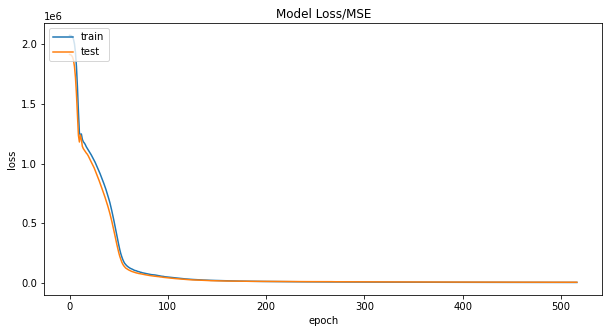

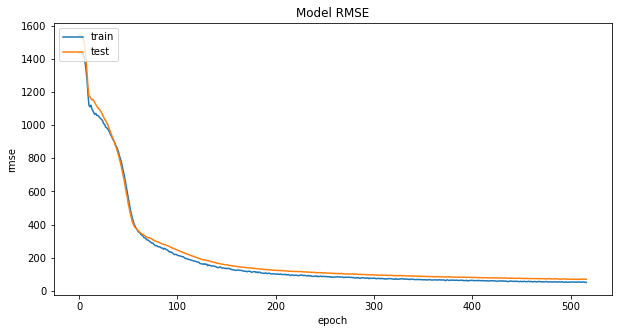



47/47 [==============================] - 0s 785us/step
MSE: 3235.749
RMSE: 56.884


In [82]:
# Best model error
show_info(model, X_train, Y_train, log, weights='weights_rossmann.best.hdf5')

As you can see, the Deep Neural Network is performing better than all the ML models

### Output

In [83]:
# Compile model (required to make predictions)
model = create_model()
# load weights
model.load_weights("weights_rossmann.best.hdf5")
print("Created model and loaded best weights from file")

Created model and loaded best weights from file


In [84]:
# Predicting using Deep Neural Network
Y_test_NN = model.predict(X_test)
# Flattening the array
Y_test_Final = []
for sublist in Y_test_NN:
    for item in sublist:
        Y_test_Final.append(item)

In [85]:
# Loading the test data
test=pd.read_csv("CE802_P3_Test.csv")
X_test_Final = test.drop('Target',axis=1)

In [31]:
# Final ML Output
X_test_Final["Target"] = pd.DataFrame({"Target": Y_test_Final})
X_test_Final.to_csv('CE802_Test_P3.csv', index=False)
X_test_Final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,154.97,9,0.57,USA,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,Low,22482.82,1097.098389
1,78.99,6,2.31,USA,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,High,17183.76,3020.926270
2,115.81,6,0.24,UK,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,Very high,17585.36,1062.064087
3,48.99,9,1023.63,Rest,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,High,14621.10,1486.039551
4,71.39,6,1.68,Europe,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,Medium,14624.56,3185.894531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,58.13,12,22.05,UK,2.13,1014.70,567.18,-11.91,2.58,266.94,-181.02,12.93,12.35,8,Very high,17222.30,699.596863
1496,135.11,18,10.14,USA,2.61,390.34,1181.84,-12.15,11.80,224.01,-272.79,9.15,22.21,6,Medium,19004.04,2402.257568
1497,89.74,6,15.21,Europe,-23.97,1745.60,1240.02,-5.13,1.68,272.01,-331.17,21.99,20.91,10,Very low,15545.40,575.478394
1498,69.63,24,0.15,USA,-2.28,1764.78,1448.96,-13.66,3.24,197.32,-243.57,2.67,17.72,10,Low,19250.20,0.000000
